In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('brain_stroke.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
df = df.drop(['stroke', 'smoking_status'], axis=1)


In [5]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0


In [7]:
df.shape

(4981, 9)

In [8]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173
std,22.662755,0.294848,0.228412,45.075373,6.790464
min,0.080000,0.000000,0.000000,55.120000,14.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000
50%,45.000000,0.000000,0.000000,91.850000,28.100000
75%,61.000000,0.000000,0.000000,113.860000,32.600000
max,82.000000,1.000000,1.000000,271.740000,48.900000


In [9]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0
...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0


In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])

# Display the updated DataFrame
print(df)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          1   
1          1  80.0             0              1             1          1   
2          0  49.0             0              0             1          1   
3          0  79.0             1              0             1          2   
4          1  81.0             0              0             1          1   
...      ...   ...           ...            ...           ...        ...   
4976       1  41.0             0              0             0          1   
4977       1  40.0             0              0             1          1   
4978       0  45.0             1              0             1          0   
4979       1  40.0             0              0             1          1   
4980       0  80.0             1              0             1          1   

      Residence_type  avg_glucose_level   bmi  
0                  1             228.69

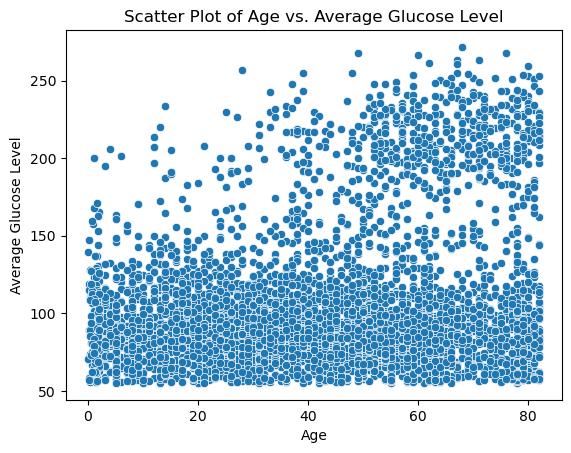

In [11]:

sns.scatterplot(x='age', y='avg_glucose_level', data=df)
plt.title('Scatter Plot of Age vs. Average Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


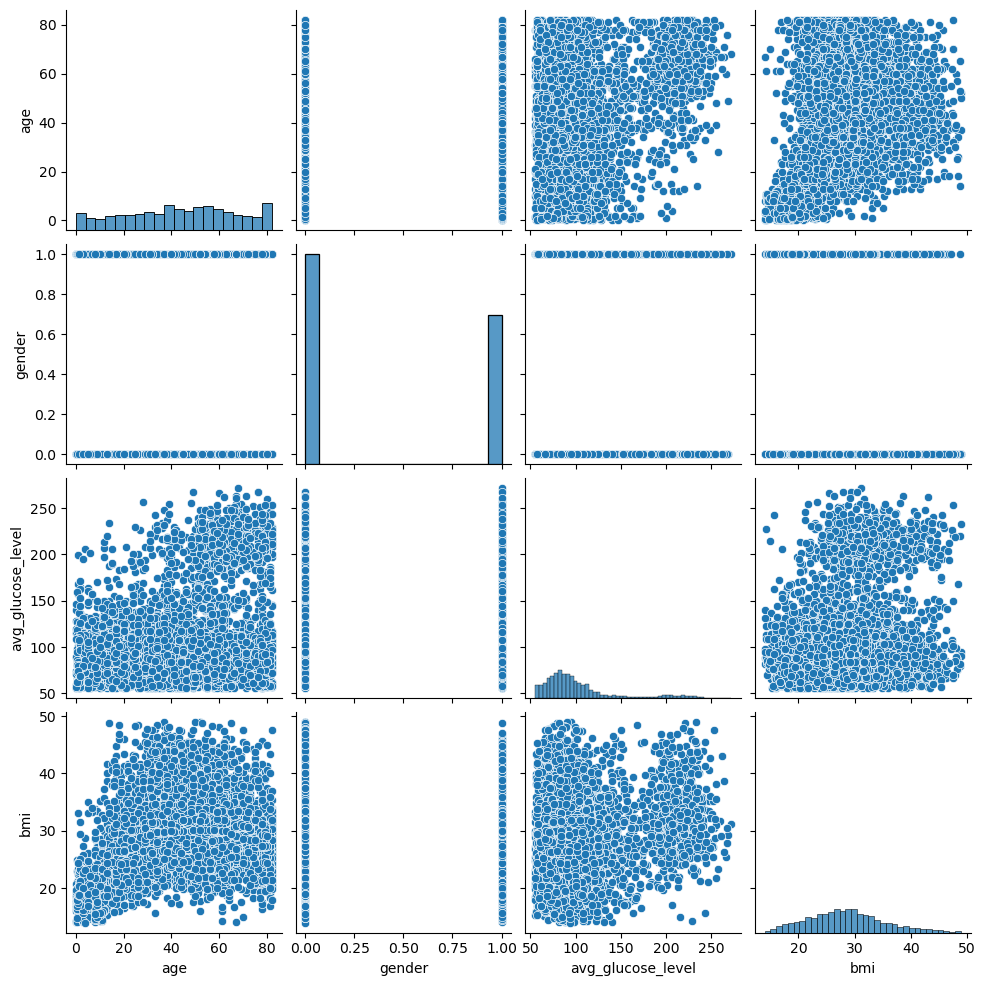

In [12]:
sns.pairplot(df[['age','gender','avg_glucose_level','bmi']])

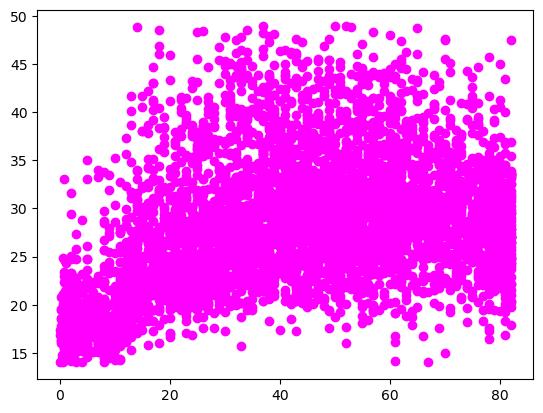

In [13]:
plt.scatter(df.age,df.bmi,color='magenta')

In [14]:
from sklearn.cluster import KMeans

In [15]:
km=KMeans(n_clusters=8)

In [16]:
km.fit(df[['age','bmi']])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [17]:
df['new_cluster1']=km.predict(df[['age','bmi']])

In [18]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,new_cluster1
0,1,67.0,0,1,1,1,1,228.69,36.6,4
1,1,80.0,0,1,1,1,0,105.92,32.5,0
2,0,49.0,0,0,1,1,1,171.23,34.4,2
3,0,79.0,1,0,1,2,0,174.12,24.0,0
4,1,81.0,0,0,1,1,1,186.21,29.0,0


In [19]:
center1=km.cluster_centers_
center1

array([[76.05875   , 29.083125  ],
       [18.6862442 , 26.1236476 ],
       [46.4425    , 28.196125  ],
       [ 5.68729204, 18.90088496],
       [60.88      , 28.12146667],
       [32.18959732, 26.30805369],
       [34.75989446, 39.00844327],
       [56.19594595, 38.26599099]])

<function matplotlib.pyplot.show(close=None, block=None)>

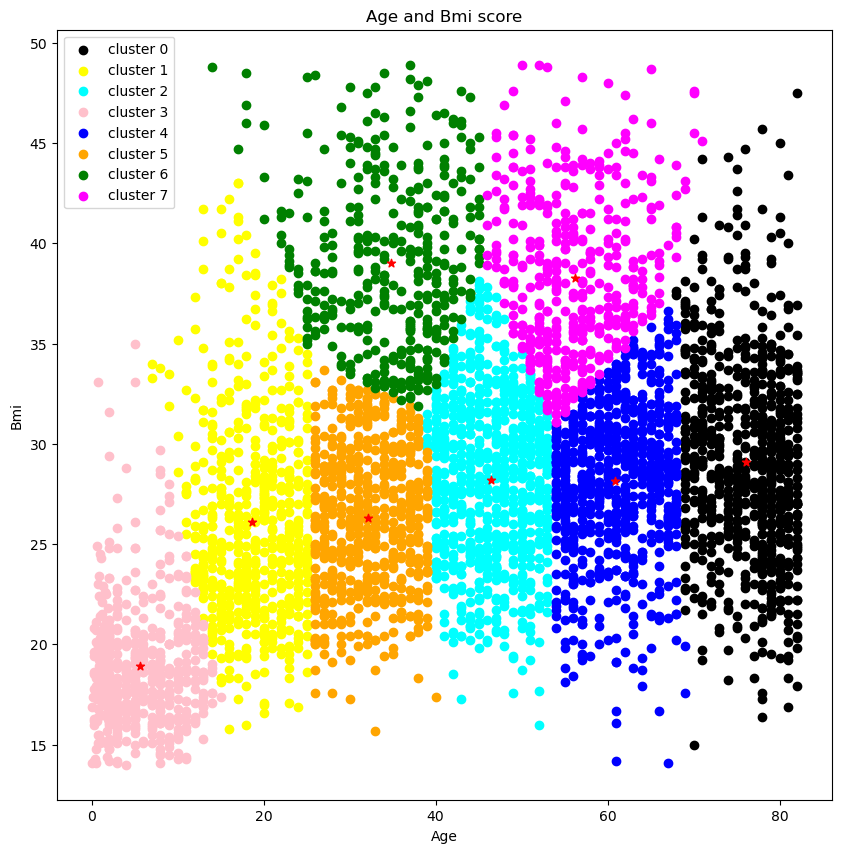

In [20]:
df0=df[df.new_cluster1==0]
df1=df[df.new_cluster1==1]
df2=df[df.new_cluster1==2]
df3=df[df.new_cluster1==3]
df4=df[df.new_cluster1==4]
df5=df[df.new_cluster1==5]
df6=df[df.new_cluster1==6]
df7=df[df.new_cluster1==7]

plt.figure(figsize=(10,10))

plt.scatter(df0.age,df0.bmi,color="black",label='cluster 0')
plt.scatter(df1.age,df1.bmi,color="yellow",label='cluster 1')
plt.scatter(df2.age,df2.bmi,color="cyan",label='cluster 2')
plt.scatter(df3.age,df3.bmi,color="pink",label='cluster 3')
plt.scatter(df4.age,df4.bmi,color="blue",label='cluster 4')
plt.scatter(df5.age,df5.bmi,color="orange",label='cluster 5')
plt.scatter(df6.age,df6.bmi,color="green",label='cluster 6')
plt.scatter(df7.age,df7.bmi,color="magenta",label='cluster 7')

plt.scatter(center1[:,0],center1[:,1],color='red',marker='*')

plt.xlabel('Age')
plt.ylabel('Bmi')
plt.title("Age and Bmi score")

plt.legend()
plt.show


In [21]:
wcss = []
clusters_range = range(1, 20)

for k in clusters_range:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['age', 'bmi']])
    wcss.append(km2.inertia_)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [22]:
wcss

[2787360.10167645,
 927205.5780981412,
 513248.64097219775,
 354446.1660982834,
 278009.51741334866,
 238427.17518618505,
 204953.72297195683,
 179926.839488162,
 159329.4077136948,
 143696.64836145772,
 130468.10929994096,
 120525.03803819687,
 111283.94609260475,
 104988.75157572284,
 97846.12988382489,
 91973.22557244007,
 88078.55548389863,
 83169.49036352389,
 77564.29272336364]

Text(0, 0.5, 'Score')

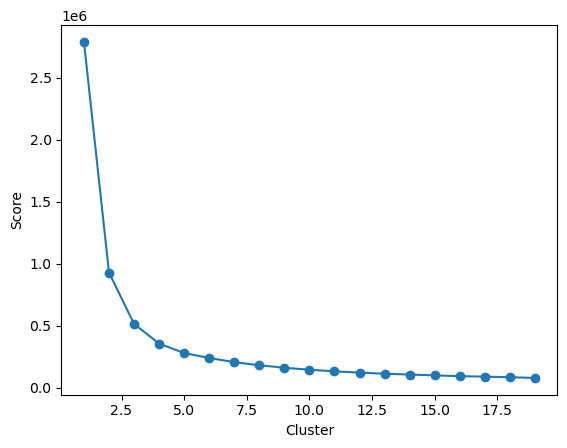

In [23]:
plt.plot(clusters_range,wcss,marker='o')
plt.xlabel('Cluster') 
plt.ylabel('Score') 

In [24]:
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable


In [25]:

from kneed import KneeLocator


In [26]:
kn = KneeLocator(clusters_range, wcss, curve='convex', direction='decreasing')


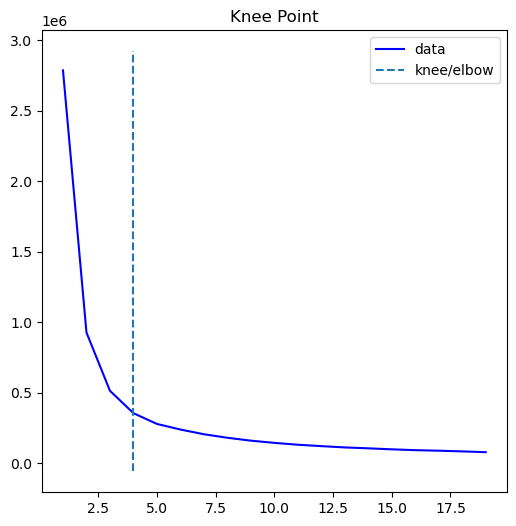

In [27]:
kn.plot_knee()

In [28]:
kn.knee

4

### AFTER OPTIMIZING


In [29]:
km3=KMeans(n_clusters=4)
km3.fit(df[['age','bmi']])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [30]:
df['optimizing _cluster']=km3.predict(df[['age','bmi']])

In [31]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,new_cluster1,optimizing _cluster
0,1,67.0,0,1,1,1,1,228.69,36.6,4,3
1,1,80.0,0,1,1,1,0,105.92,32.5,0,3
2,0,49.0,0,0,1,1,1,171.23,34.4,2,0
3,0,79.0,1,0,1,2,0,174.12,24.0,0,3
4,1,81.0,0,0,1,1,1,186.21,29.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,2,2
4977,1,40.0,0,0,1,1,1,191.15,31.1,2,2
4978,0,45.0,1,0,1,0,0,95.02,31.8,2,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,2,2


In [32]:
center2=km3.cluster_centers_
center2

array([[53.52887735, 31.01946788],
       [10.83445199, 21.66673133],
       [32.86726324, 30.16621924],
       [73.54026217, 29.36058052]])

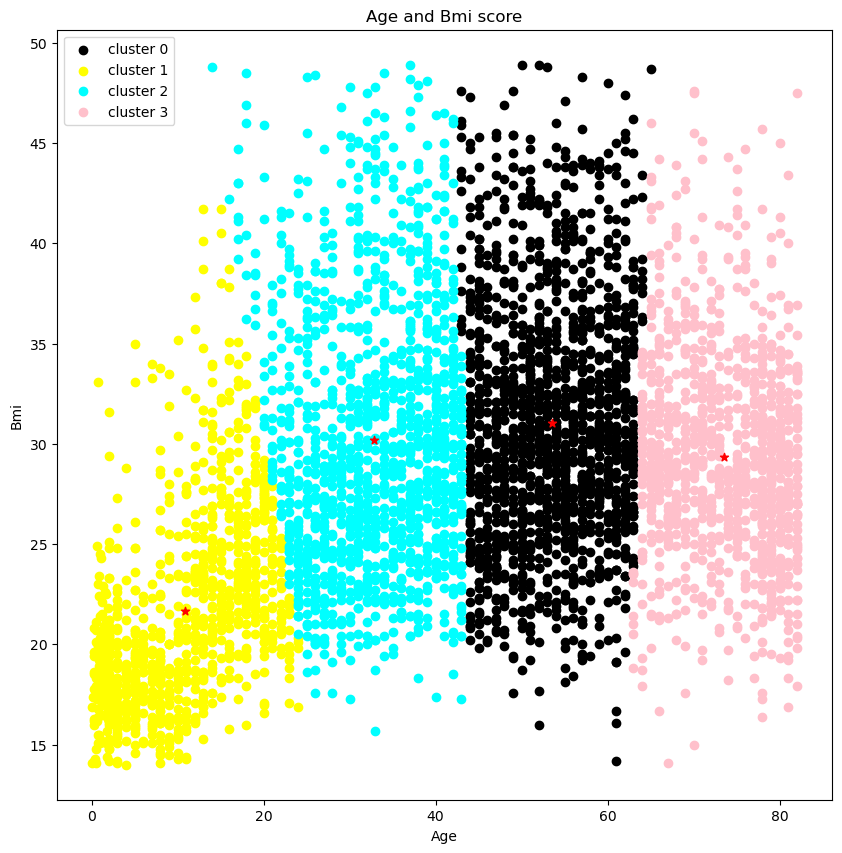

In [33]:
# Assuming 'optimizing_cluster' is the correct column name

df['optimizing_cluster'] = km3.predict(df[['age', 'bmi']])
center2 = km3.cluster_centers_

df0 = df[df['optimizing_cluster'] == 0]
df1 = df[df['optimizing_cluster'] == 1]
df2 = df[df['optimizing_cluster'] == 2]
df3 = df[df['optimizing_cluster'] == 3]

plt.figure(figsize=(10, 10))

plt.scatter(df0.age, df0.bmi, color="black", label='cluster 0')
plt.scatter(df1.age, df1.bmi, color="yellow", label='cluster 1')
plt.scatter(df2.age, df2.bmi, color="cyan", label='cluster 2')
plt.scatter(df3.age, df3.bmi, color="pink", label='cluster 3')

plt.scatter(center2[:, 0], center2[:, 1], color='red', marker='*')

plt.xlabel('Age')
plt.ylabel('Bmi')
plt.title("Age and Bmi score")

plt.legend()
plt.show()


In [34]:
wcss1 = []
clusters_range = range(1, 20)

for k in clusters_range:
    km4 = KMeans(n_clusters=k)
    km4.fit(df[['age', 'avg_glucose_level']])
    wcss1.append(km4.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [35]:
wcss1

[12676040.712720018,
 4649872.078581946,
 3115065.059464649,
 2191079.0842903275,
 1828216.4551135716,
 1528784.02118549,
 1322930.2531642416,
 1181615.0574815923,
 1056833.8722232236,
 953844.6502128878,
 870885.068292689,
 799208.4593351008,
 731376.9421481679,
 679383.3607574803,
 633847.8099370244,
 595299.3908847964,
 562310.3887977521,
 535103.0732281338,
 510161.51053535833]

Text(0, 0.5, 'Score')

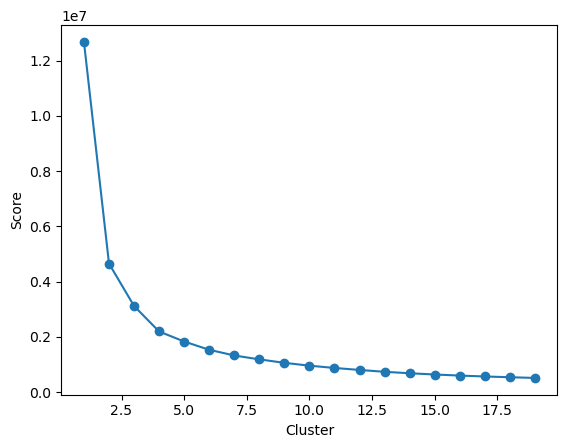

In [36]:
plt.plot(clusters_range,wcss1,marker='o')
plt.xlabel('Cluster') 
plt.ylabel('Score')

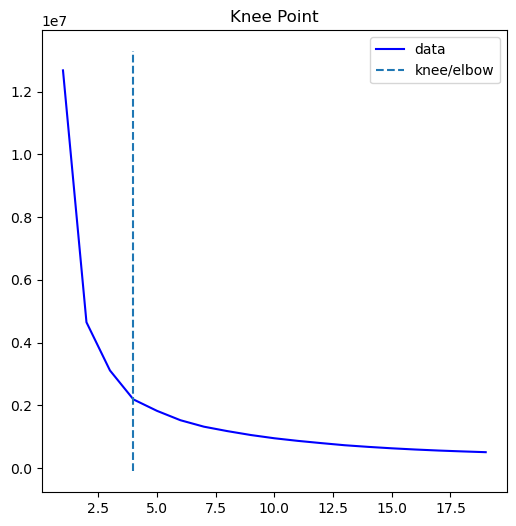

In [37]:
kn1 = KneeLocator(clusters_range, wcss1, curve='convex', direction='decreasing')
kn1.plot_knee()

In [38]:
kn1.knee

4

In [39]:
km5=KMeans(n_clusters=4)
km5.fit(df[['age','avg_glucose_level']])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

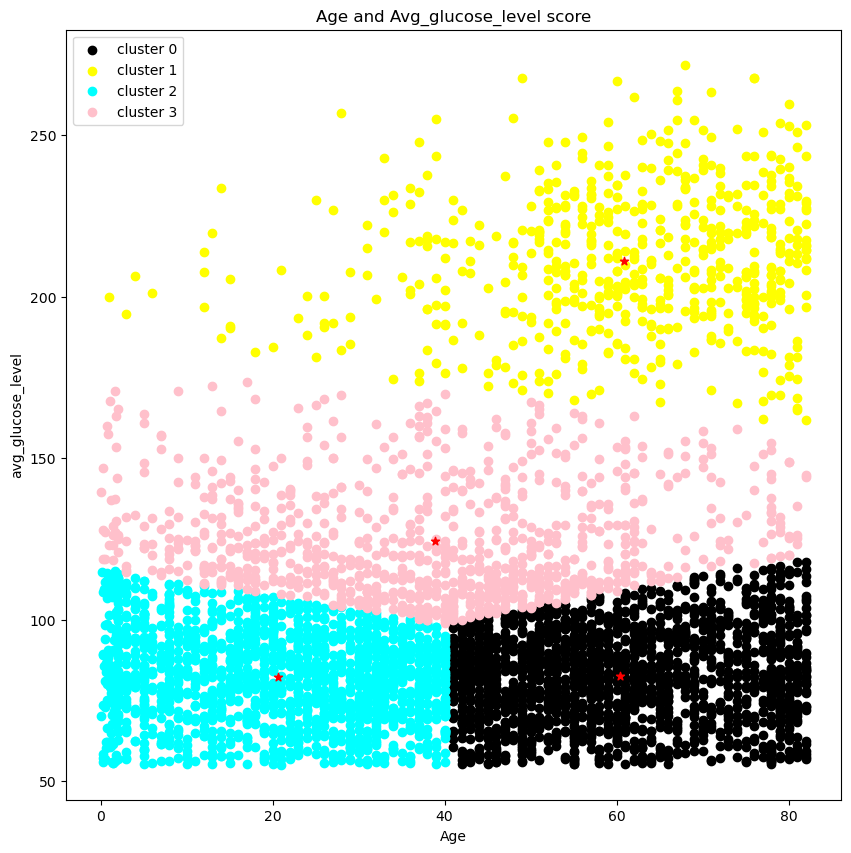

In [40]:
df['optimizing_cluster1'] = km5.predict(df[['age', 'avg_glucose_level']])
center3 = km5.cluster_centers_

df0 = df[df['optimizing_cluster1'] == 0]
df1 = df[df['optimizing_cluster1'] == 1]
df2 = df[df['optimizing_cluster1'] == 2]
df3 = df[df['optimizing_cluster1'] == 3]

plt.figure(figsize=(10, 10))

plt.scatter(df0.age, df0.avg_glucose_level, color="black", label='cluster 0')
plt.scatter(df1.age, df1.avg_glucose_level, color="yellow", label='cluster 1')
plt.scatter(df2.age, df2.avg_glucose_level, color="cyan", label='cluster 2')
plt.scatter(df3.age, df3.avg_glucose_level, color="pink", label='cluster 3')

plt.scatter(center3[:, 0], center3[:, 1], color='red', marker='*')

plt.xlabel('Age')
plt.ylabel('avg_glucose_level')
plt.title("Age and Avg_glucose_level score")

plt.legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Text(0, 0.5, 'Score')

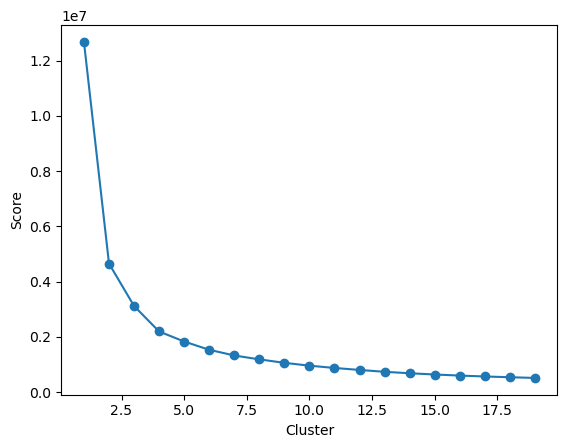

In [41]:
wcss2 = []
clusters_range = range(1, 20)

for k in clusters_range:
    km6 = KMeans(n_clusters=k)
    km6.fit(df[['bmi', 'avg_glucose_level']])
    wcss2.append(km6.inertia_)
plt.plot(clusters_range,wcss1,marker='o')
plt.xlabel('Cluster') 
plt.ylabel('Score')


In [42]:
wcss2

[10347940.157793213,
 2486927.722787237,
 1272949.8669070685,
 870248.1434818398,
 670576.4042485066,
 527892.6177235402,
 445833.86129918887,
 397861.8141404727,
 355261.9773168618,
 319709.778981382,
 290267.43458794145,
 267244.5109502816,
 245521.00668959387,
 227922.7072652566,
 212945.18380327773,
 200242.5029379454,
 190754.6501406794,
 179615.60852926972,
 170943.4681742097]

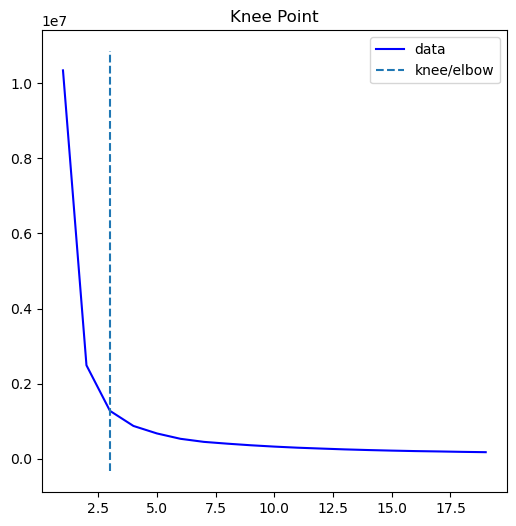

In [43]:
kn2 = KneeLocator(clusters_range, wcss2, curve='convex', direction='decreasing')
kn2.plot_knee()

In [44]:
kn2.knee

3

In [45]:
km7=KMeans(n_clusters=3)
km7.fit(df[['bmi','avg_glucose_level']])


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [46]:
center4 = km6.cluster_centers_

In [47]:
center4

array([[ 31.08333333, 183.74715686],
       [ 23.10583554, 100.00251989],
       [ 33.83590734,  63.28528958],
       [ 27.12659176, 124.88509363],
       [ 33.50258621, 232.36939655],
       [ 39.14196429,  89.73857143],
       [ 23.90362173,  72.83774648],
       [ 30.94347826, 252.37217391],
       [ 34.83216783, 106.69293706],
       [ 27.77474747, 161.05606061],
       [ 29.23354167,  81.95789583],
       [ 32.05      , 201.34222222],
       [ 29.5509434 , 142.35427673],
       [ 29.05707657,  93.07689095],
       [ 24.39619883, 111.91026316],
       [ 37.21190476,  75.13440476],
       [ 33.2609589 , 216.95835616],
       [ 23.60724638,  60.81168116],
       [ 20.50294906,  85.80970509]])

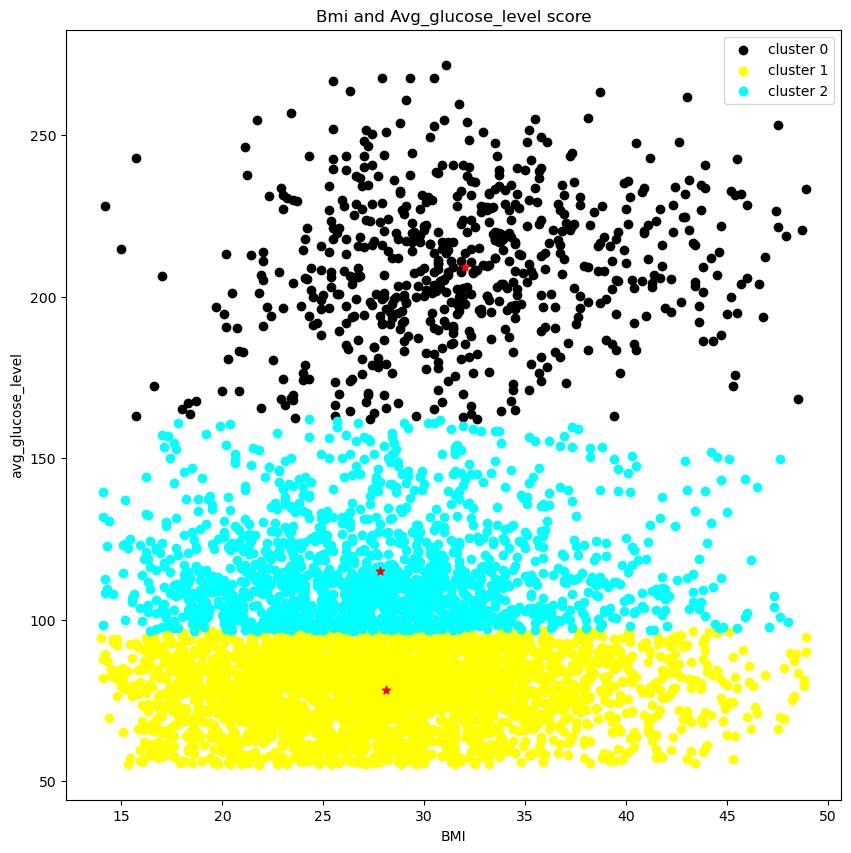

In [48]:
df['optimizing_cluster2'] = km7.predict(df[['bmi', 'avg_glucose_level']])
center4 = km7.cluster_centers_

df0 = df[df['optimizing_cluster2'] == 0]
df1 = df[df['optimizing_cluster2'] == 1]
df2 = df[df['optimizing_cluster2'] == 2]


plt.figure(figsize=(10, 10))

plt.scatter(df0.bmi, df0.avg_glucose_level, color="black", label='cluster 0')
plt.scatter(df1.bmi, df1.avg_glucose_level, color="yellow", label='cluster 1')
plt.scatter(df2.bmi, df2.avg_glucose_level, color="cyan", label='cluster 2')

plt.scatter(center4[:, 0], center4[:, 1], color='red', marker='*')

plt.xlabel('BMI')
plt.ylabel('avg_glucose_level')
plt.title("Bmi and Avg_glucose_level score")

plt.legend()
plt.show()

# K-means clustering

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import pandas as pd



# Extract features (X) and true labels (y)
X = df.drop(['heart_disease'], axis=1)  # Features
y_true = df['heart_disease']  # True labels

# Perform K-means clustering
kmeans = KMeans(n_clusters=2)  # Assuming 2 clusters
kmeans.fit(X)

# Get the cluster labels assigned by K-means
kmeans_labels = kmeans.labels_

# Evaluate accuracy (compare kmeans_labels with true labels)
accuracy = accuracy_score(y_true, kmeans_labels)

print("Accuracy of K-means clustering:", accuracy)


Accuracy of K-means clustering: 0.15699658703071673


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# hierarchical clustering & Dendrogram

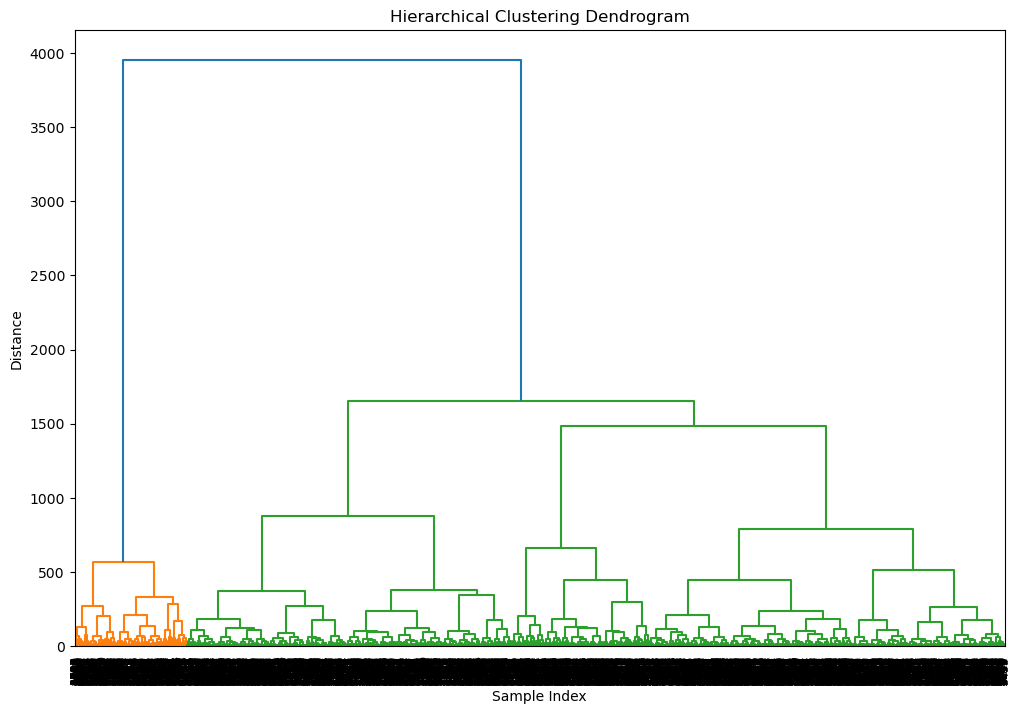

Accuracy of hierarchical clustering: 0.8652880947600884


In [50]:

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage



# Drop non-numeric columns (if any) and target variable for clustering
X = df.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'heart_disease'], axis=1)

# Perform hierarchical clustering
model = AgglomerativeClustering(n_clusters=2)  # You can adjust the number of clusters as needed
cluster_labels = model.fit_predict(X)

# Visualize the clusters using a dendrogram
linkage_matrix = linkage(X, method='ward')  # You can choose different linkage methods as needed
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Calculate accuracy of clustering (if ground truth labels are available)
# Assuming 'heart_disease' is the target variable used for clustering
# Adjust the accuracy calculation according to your dataset and requirements
true_labels = df['heart_disease']  # Ground truth labels (if available)
hierarchical_accuracy = accuracy_score(true_labels, cluster_labels)
print("Accuracy of hierarchical clustering:",hierarchical_accuracy)


# Silhouette Score & Adjusted Rand Index (ARI)

In [52]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score
import pandas as pd

# Load the dataset
# Assuming the dataset is stored in a DataFrame named 'df'

# Extract features (X) and true labels (y)
X = df.drop(['heart_disease'], axis=1)  # Features
y_true = df['heart_disease']  # True labels

# Perform hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=2)  # Assuming 2 clusters
hierarchical.fit(X)

# Get the cluster labels assigned by hierarchical clustering
hierarchical_labels = hierarchical.labels_

# Evaluate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(y_true, hierarchical_labels)

# Evaluate silhouette score
silhouette_avg = silhouette_score(X, hierarchical_labels)

print("Silhouette Score of hierarchical clustering:", silhouette_avg)
print("Adjusted Rand Index (ARI) of hierarchical clustering:", ari)


Silhouette Score of hierarchical clustering: 0.6552277325084848
Adjusted Rand Index (ARI) of hierarchical clustering: 0.14188279437501733


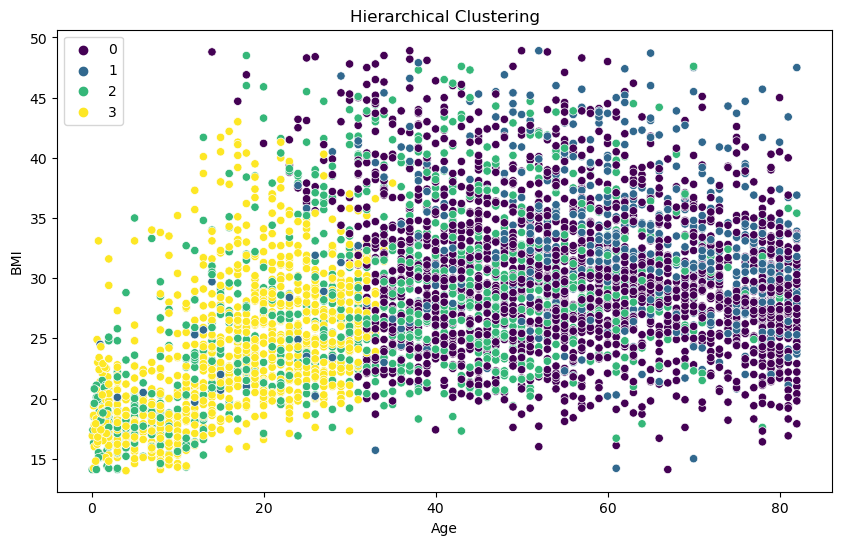

In [53]:
from sklearn.cluster import AgglomerativeClustering


# Assuming 'X' is your feature matrix

# Perform hierarchical clustering
model = AgglomerativeClustering(n_clusters=4)  # You can adjust the number of clusters as needed
cluster_labels = model.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', data=df, hue=cluster_labels, palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

# Mean Accuracy & Standard Error

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming 'heart_disease' is the target variable
X = df.drop('heart_disease', axis=1)  # Features
y = df['heart_disease']  # Target variable

# Initialize the logistic regression model
model = LogisticRegression()

# Perform k-fold cross-validation with k=5 (for example)
k = 5
scores = cross_val_score(model, X, y, cv=k)

# Calculate mean accuracy and standard deviation of accuracy
mean_accuracy = np.mean(scores)
std_dev_accuracy = np.std(scores)

# Calculate standard error
standard_error = std_dev_accuracy / np.sqrt(k)

print("Mean Accuracy:", mean_accuracy)
print("Standard Error:", standard_error)


Mean Accuracy: 0.9443883860416591
Standard Error: 0.0006141428250260757


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_